# Imports and constants

In [115]:
%reset -f

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

# Load data and explore columns

In [117]:
df_titanic = pd.read_csv('spaceship_titanic.csv')
df_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [118]:
df_titanic.info()
# There are 7 categorical columns, however 2 of them seem to be boolean - let's explore that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [119]:
df_titanic['VIP'].value_counts()
# We must change the type from object to bool

VIP
False    8291
True      199
Name: count, dtype: int64

In [120]:
df_titanic['CryoSleep'].value_counts()
# We must change the type from object to bool

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [121]:
df_titanic.describe().T
# The average customer is of age 29 and the majority of customers are in the age range [ 19 - 38 ]
# Also most people don't spent money for any service seperately

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [122]:
df_titanic.isna().sum()
# Almost all values are filled

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [123]:
df_titanic.dropna().shape[0]
# We would lose 20% of data if we drop all nan rows, so it would be better idea to fill the missing values as they are not so many

6606

# Prepare data for visualization

In [124]:
bool_columns = ['CryoSleep', 'VIP']
df_titanic[bool_columns] = df_titanic[bool_columns].astype('bool')

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


In [125]:
df_titanic['Cabin'].value_counts()
# Let's seperate Cabin into 3 columns

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [126]:
df_titanic[['CabinDeck', 'CabinNumber', 'CabinSide']] = df_titanic['Cabin'].str.split('/',expand=True)
# We would also look for relation with the number of people in one room

df_titanic['CabinRoomates'] = df_titanic.groupby('Cabin')['Cabin'].transform('count')
# Now we can look for correlation with the cabin deck, number or side as otherwise the values were mostly unique

df_titanic = df_titanic.drop(['Cabin'], axis=1)
df_titanic 


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNumber,CabinSide,CabinRoomates
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,1.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,2.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,2.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,1.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,1.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,2.0


In [127]:
df_titanic[['FirstName', 'FamilyName']] = df_titanic['Name'].str.split(' ',expand=True)
df_titanic = df_titanic.drop(['Name'], axis=1)
df_titanic 
# There may be correlation with first or family name and transportation, although it is unlikely

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNumber,CabinSide,CabinRoomates,FirstName,FamilyName
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1.0,Maham,Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1.0,Juanna,Vines
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,2.0,Altark,Susent
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2.0,Solam,Susent
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1.0,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,1.0,Gravior,Noxnuther
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,1.0,Kurta,Mondalley
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,1.0,Fayey,Connon
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,2.0,Celeon,Hontichre


In [128]:
df_titanic[['PassengerGroup', 'PassengerNumber']] = df_titanic['PassengerId'].str.split('_',expand=True).astype('int')
df_titanic = df_titanic.drop(['PassengerId'], axis=1)
df_titanic 
# As above there may be correlation, although highly unlikely
# I would also guess the PassangerGroup is dependent on when the purchase was made 
# So it makes sense that people who are better settled in their life would make the purchase earlier
# Although we don't know if that has correlation with being transported

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNumber,CabinSide,CabinRoomates,FirstName,FamilyName,PassengerGroup,PassengerNumber
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1.0,Maham,Ofracculy,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1.0,Juanna,Vines,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,2.0,Altark,Susent,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2.0,Solam,Susent,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1.0,Willy,Santantines,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,1.0,Gravior,Noxnuther,9276,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,1.0,Kurta,Mondalley,9278,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,1.0,Fayey,Connon,9279,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,2.0,Celeon,Hontichre,9280,1


In [129]:
df_titanic['Spent'] = df_titanic[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df_titanic

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNumber,CabinSide,CabinRoomates,FirstName,FamilyName,PassengerGroup,PassengerNumber,Spent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1.0,Maham,Ofracculy,1,1,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1.0,Juanna,Vines,2,1,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,2.0,Altark,Susent,3,1,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2.0,Solam,Susent,3,2,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1.0,Willy,Santantines,4,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,1.0,Gravior,Noxnuther,9276,1,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,1.0,Kurta,Mondalley,9278,1,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,1.0,Fayey,Connon,9279,1,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,2.0,Celeon,Hontichre,9280,1,4637.0


In [130]:
df_titanic.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinDeck', 'CabinNumber', 'CabinSide', 'CabinRoomates', 'FirstName',
       'FamilyName', 'PassengerGroup', 'PassengerNumber', 'Spent'],
      dtype='object')

# Visualize data

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


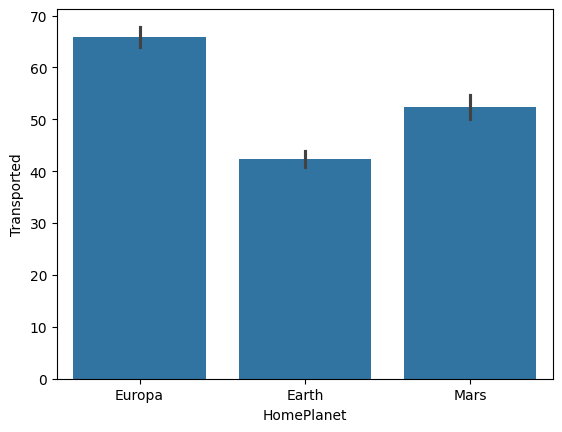

In [131]:
print(df_titanic['HomePlanet'].value_counts())
sns.barplot(df_titanic, x='HomePlanet', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# We see all categories are well represented
# Also people from Europe are transported the most at ~65%, followed by Mars people at ~55% and Earth is last at ~40%

CryoSleep
False    5439
True     3254
Name: count, dtype: int64


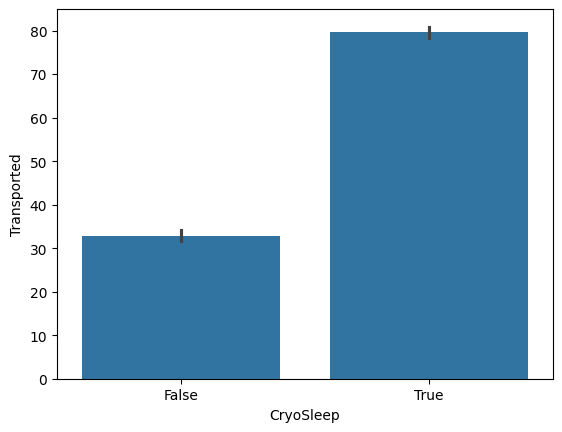

In [132]:
print(df_titanic['CryoSleep'].value_counts())
sns.barplot(df_titanic, x='CryoSleep', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# Passanger in CryoSleep are transported almost three times more often than the others

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


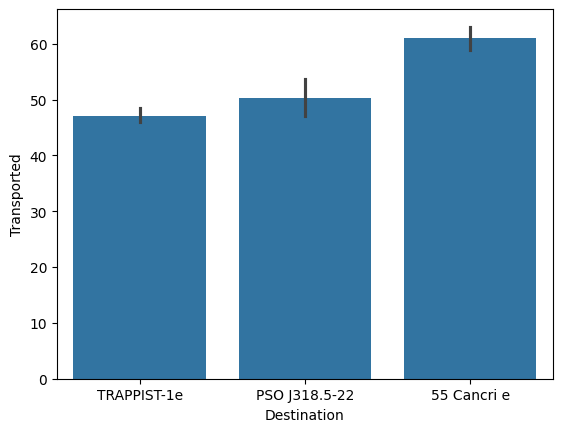

In [133]:
print(df_titanic['Destination'].value_counts())
sns.barplot(df_titanic, x='Destination', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# Most people go to TRAPPIST-1e and have the least probability of being transported (~48%)
# Passangers travelling to 55 Cancri e have the highest transportation probability (~63%)
# Least people go to PSO J318.5-22 and are trasported with ~51%

<Axes: >

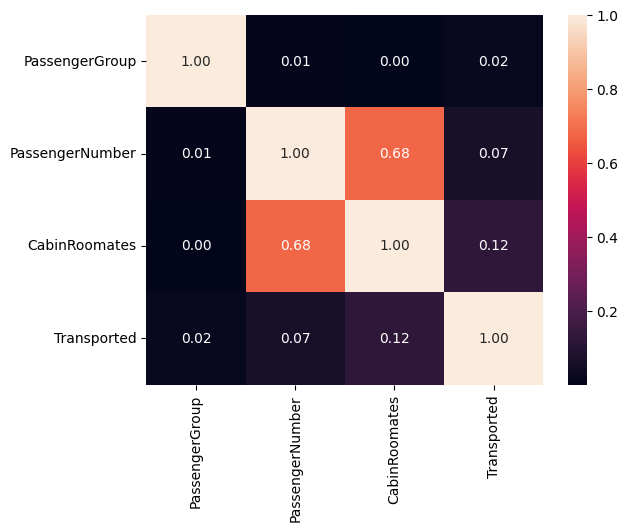

In [134]:
sns.heatmap(df_titanic[["PassengerGroup", "PassengerNumber", "CabinRoomates", "Transported"]].corr(), annot=True, fmt= '.2f')
# As expected there isn't correlation between PassangerId and being transported
# There is only 7% correlation with PassengerNumber and Transportation
# However there is high relation between CabinRoomates and PassengerNumber
# So it would be best if we only used CabinRoomates for our model as it has 12% corr with transportation

Age
0.0     178
1.0      67
2.0      75
3.0      75
4.0      71
       ... 
75.0      4
76.0      2
77.0      2
78.0      3
79.0      3
Name: count, Length: 80, dtype: int64


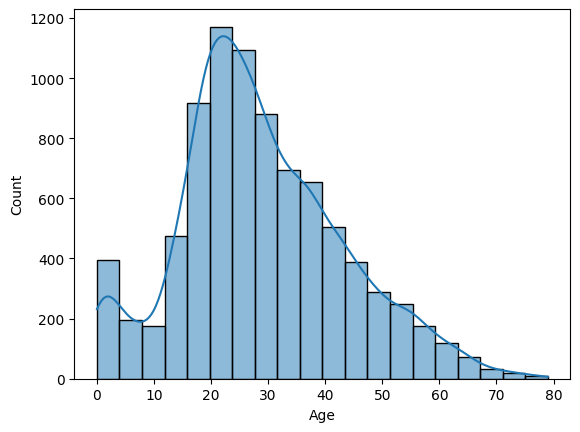

In [135]:
print(df_titanic['Age'].value_counts().sort_index())
sns.histplot(df_titanic, x='Age', binwidth=4, kde=True);
# It is rather strange there are so many passenger that are 0 years old ( should ask client )
# Otherwise, the age distribution seems usual

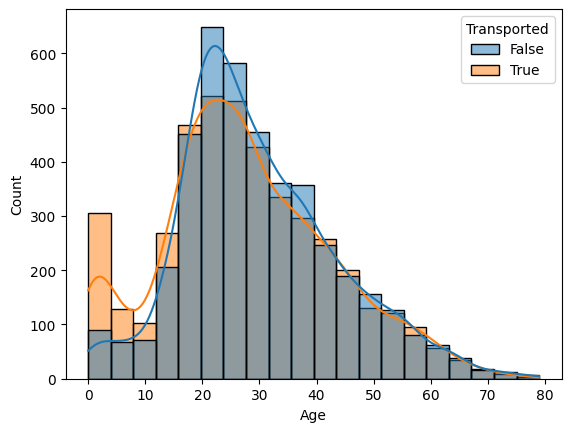

In [136]:
sns.histplot(df_titanic, x='Age', binwidth=4, hue='Transported', kde=True);
# Passengers under 18 seems to get transported more often than not
# This is seen the most with 0 years olds where more than 75% are transported
# The oposite is true for the age group 18 - 42
# As for the rest passengers (42+) the probability is pretty even

VIP
False    8291
True      402
Name: count, dtype: int64


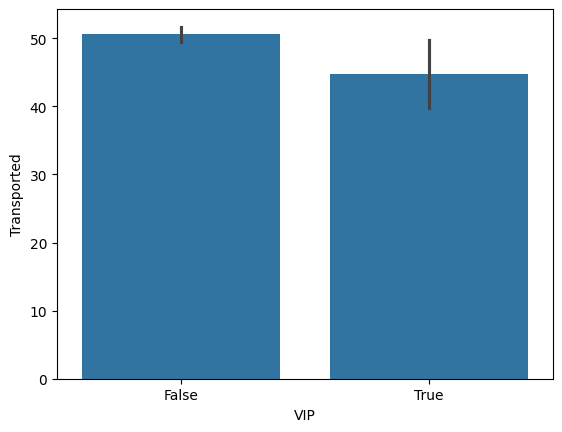

In [137]:
print(df_titanic['VIP'].value_counts().sort_index())
sns.barplot(df_titanic, x='VIP', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# VIP passengers are transported a little less (by 6%) on avarage
# However, we don't have much data for VIP passengers so the expected probability varies more

<Axes: >

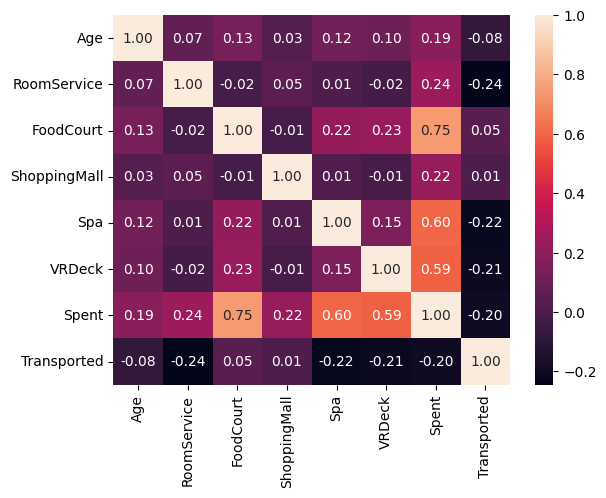

In [138]:
sns.heatmap(df_titanic[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Spent', 'Transported']].corr(), annot=True, fmt= '.2f')
# We notice that there is negative correlation between transportation and money spent on RoomService, Spa and VRDeck (all between 21% - 24%)
# Also, FoodCourt, Spa and VRDeck have strong correlation between each other (FoodCourt and Spa is 22%)
# By using the above numbers we will calculate the minimum possible correlation between FoodCourt and Transportation
# It is 0.22 * 0.22 ~ 0.05, therefore the minimum correlation and the real one are equal
# That would mean FoodCourt won't give our model additional information and would only bring noice

# So we would exclude FoodCourt and ShoppingMall (1% corr) expenses 

# Age also have positive correlation with money spent

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64


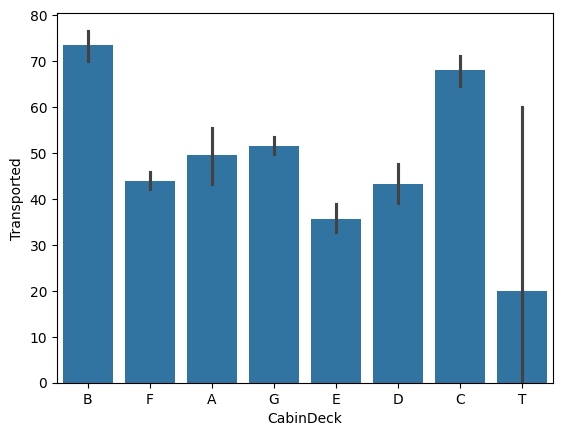

In [139]:
print(df_titanic['CabinDeck'].value_counts())
sns.barplot(df_titanic, x='CabinDeck', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# We don't have enough data for passangers on deck T to conclude anything
# There is differences on transportation probabilities for different decks 
# Deck B is highest and E - lowest with 30% difference

In [140]:
print(df_titanic['CabinNumber'].value_counts())
# The cabin numbers are too unique to analyze them further

CabinNumber
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64


CabinRoomates
1.0    5427
2.0    1372
3.0     747
4.0     416
5.0     235
6.0     198
7.0      91
8.0       8
Name: count, dtype: int64


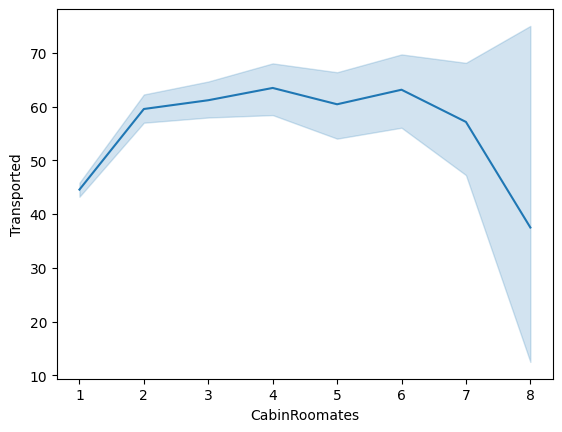

In [141]:
print(df_titanic['CabinRoomates'].value_counts())
sns.lineplot(df_titanic, x='CabinRoomates', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# Cabins have between 1 - 8 people in them
# However, for 8 people there isn't enough data to conclude anything
# It seems like people who are alone have lower chance to be transported, by over 15%
# The others probabilities are mostly equal

CabinSide
S    4288
P    4206
Name: count, dtype: int64


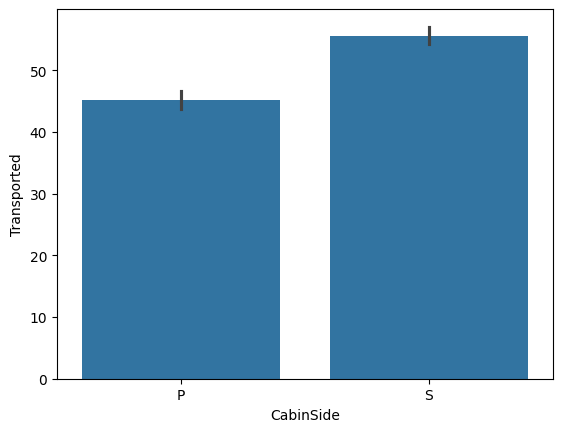

In [142]:
print(df_titanic['CabinSide'].value_counts())
sns.barplot(df_titanic, x='CabinSide', y='Transported', estimator=lambda x: sum(x==1) * 100.0 / len(x));
# Passangers on S side have 10% higher chance to be transported than the ones on P side

In [143]:
print(df_titanic['FirstName'].value_counts())
print(df_titanic['FamilyName'].value_counts())
# Sadly, there isn't a common name and we will choose to not use this columns as they would be just noice

FirstName
Idace      13
Loree      12
Glena      11
Gwendy     11
Kaye       11
           ..
Capies      1
Blues       1
Preonon     1
Siese       1
Chain       1
Name: count, Length: 2706, dtype: int64
FamilyName
Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: count, Length: 2217, dtype: int64


# Clean data for modelling

In [144]:
df_titanic.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinDeck', 'CabinNumber', 'CabinSide', 'CabinRoomates', 'FirstName',
       'FamilyName', 'PassengerGroup', 'PassengerNumber', 'Spent'],
      dtype='object')

In [145]:
df_titanic = df_titanic.drop(['FirstName', 'FamilyName', 'CabinNumber', 'Spent', 'ShoppingMall', 'FoodCourt', 'PassengerGroup', 'PassengerNumber'], axis=1) 
df_titanic

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported,CabinDeck,CabinSide,CabinRoomates
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,False,B,P,1.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,549.0,44.0,True,F,S,1.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,6715.0,49.0,False,A,S,2.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,3329.0,193.0,False,A,S,2.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,565.0,2.0,True,F,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,1643.0,74.0,False,A,P,1.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,False,G,S,1.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,1.0,0.0,True,G,S,1.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,353.0,3235.0,False,E,S,2.0


In [146]:
df_titanic = df_titanic.fillna(0)
df_titanic.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
Spa              0
VRDeck           0
Transported      0
CabinDeck        0
CabinSide        0
CabinRoomates    0
dtype: int64

In [147]:
df_titanic = pd.get_dummies(df_titanic, columns=['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide'])
df_titanic

,CryoSleep,Age,VIP,RoomService,Spa,VRDeck,Transported,CabinRoomates,HomePlanet_0,HomePlanet_Earth,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_0,CabinSide_P,CabinSide_S
0,False,39.0,False,0.0,0.0,0.0,False,1.0,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,24.0,False,109.0,549.0,44.0,True,1.0,False,True,...,False,False,False,False,True,False,False,False,False,True
2,False,58.0,True,43.0,6715.0,49.0,False,2.0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,3329.0,193.0,False,2.0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,565.0,2.0,True,1.0,False,True,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,1643.0,74.0,False,1.0,False,False,...,False,False,False,False,False,False,False,False,True,False
8689,True,18.0,False,0.0,0.0,0.0,False,1.0,False,True,...,False,False,False,False,False,True,False,False,False,True
8690,False,26.0,False,0.0,1.0,0.0,True,1.0,False,True,...,False,False,False,False,False,True,False,False,False,True
8691,False,32.0,False,0.0,353.0,3235.0,False,2.0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [148]:
X = df_titanic.drop("Transported", axis=1)
X

,CryoSleep,Age,VIP,RoomService,Spa,VRDeck,CabinRoomates,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_0,CabinSide_P,CabinSide_S
0,False,39.0,False,0.0,0.0,0.0,1.0,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,False,24.0,False,109.0,549.0,44.0,1.0,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,False,58.0,True,43.0,6715.0,49.0,2.0,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,3329.0,193.0,2.0,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,565.0,2.0,1.0,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,1643.0,74.0,1.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
8689,True,18.0,False,0.0,0.0,0.0,1.0,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8690,False,26.0,False,0.0,1.0,0.0,1.0,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8691,False,32.0,False,0.0,353.0,3235.0,2.0,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [149]:
y = df_titanic["Transported"]
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [151]:
scaler = StandardScaler()
scaler

StandardScaler()

In [152]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-0.77108888,  0.85057153, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148],
       [-0.77108888, -0.62384041, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148],
       [-0.77108888, -0.55682169, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148],
       ...,
       [ 1.29686735, -0.62384041, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148],
       [-0.77108888, -0.55682169, -0.21867046, ..., -0.15389899,
         1.03844791, -0.99147187],
       [-0.77108888, -0.62384041, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148]])

In [153]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[ 1.29686735, -1.76315873, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148],
       [-0.77108888,  1.58777751, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148],
       [-0.77108888, -0.62384041, -0.21867046, ..., -0.15389899,
         1.03844791, -0.99147187],
       ...,
       [-0.77108888,  0.31442174, -0.21867046, ..., -0.15389899,
         1.03844791, -0.99147187],
       [-0.77108888,  0.11336556, -0.21867046, ..., -0.15389899,
         1.03844791, -0.99147187],
       [-0.77108888, -0.62384041, -0.21867046, ..., -0.15389899,
        -0.9629756 ,  1.00860148]])

# Model

In [154]:
result_df = pd.DataFrame(columns=["experiment", "accuracy", "precision", "recall", "f1-score"])
result_df
# We will store the statistics of different models here

,experiment,accuracy,precision,recall,f1-score


In [155]:
def addResults(y_prediction, name):
    result_df.loc[len(result_df)] = [
        name, 
        accuracy_score(y_test, y_prediction), 
        precision_score(y_test, y_prediction),
        recall_score(y_test, y_prediction),
        f1_score(y_test, y_prediction)
    ]  

# Help function

### KNN

In [156]:
y_prediction = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)
result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "knn")
result_df

              precision    recall  f1-score   support

       False       0.75      0.76      0.75       438
        True       0.75      0.75      0.75       432

    accuracy                           0.75       870
   macro avg       0.75      0.75      0.75       870
weighted avg       0.75      0.75      0.75       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.75174,0.75,0.750869


###

### LinearSVC

In [157]:
y_prediction = LinearSVC().fit(X_train, y_train).predict(X_test)
result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "linear-svc")
result_df

/Users/bilyanaindzheva/miniforge3/envs/machine_learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.50      0.00      0.00       438
        True       0.50      1.00      0.66       432

    accuracy                           0.50       870
   macro avg       0.50      0.50      0.33       870
weighted avg       0.50      0.50      0.33       870



/Users/bilyanaindzheva/miniforge3/envs/machine_learning/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077


In [158]:
y_prediction = LinearSVC().fit(scaled_X_train, y_train).predict(scaled_X_test)
result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "linear-svc-scaled")
result_df

/Users/bilyanaindzheva/miniforge3/envs/machine_learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.78      0.78      0.78       438
        True       0.77      0.77      0.77       432

    accuracy                           0.78       870
   macro avg       0.78      0.78      0.78       870
weighted avg       0.78      0.78      0.78       870



/Users/bilyanaindzheva/miniforge3/envs/machine_learning/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044


### SVC

In [159]:
y_prediction = SVC().fit(X_train, y_train).predict(X_test)
result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "svc")
result_df

              precision    recall  f1-score   support

       False       0.83      0.74      0.78       438
        True       0.76      0.84      0.80       432

    accuracy                           0.79       870
   macro avg       0.79      0.79      0.79       870
weighted avg       0.79      0.79      0.79       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246


### LogisticRegression

In [160]:
y_prediction = LogisticRegression().fit(X_train, y_train).predict(X_test)
result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "logistic-regression")
result_df

              precision    recall  f1-score   support

       False       0.79      0.77      0.78       438
        True       0.77      0.79      0.78       432

    accuracy                           0.78       870
   macro avg       0.78      0.78      0.78       870
weighted avg       0.78      0.78      0.78       870



/Users/bilyanaindzheva/miniforge3/envs/machine_learning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246
4,logistic-regression,0.779310,0.772727,0.787037,0.779817


### Linear Regression

In [161]:
y_prediction = LinearRegression().fit(X_train, y_train).predict(X_test)
y_prediction = y_prediction.round().astype("bool")

result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "linear-regression")
result_df

              precision    recall  f1-score   support

       False       0.75      0.81      0.78       438
        True       0.79      0.72      0.75       432

    accuracy                           0.77       870
   macro avg       0.77      0.77      0.77       870
weighted avg       0.77      0.77      0.77       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246
4,logistic-regression,0.779310,0.772727,0.787037,0.779817
5,linear-regression,0.765517,0.786432,0.724537,0.754217


### Decision Tree Classifier

In [162]:
y_prediction = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
y_prediction = y_prediction.round().astype("bool")

result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "decision-tree-classifier")
result_df

              precision    recall  f1-score   support

       False       0.73      0.74      0.73       438
        True       0.73      0.72      0.73       432

    accuracy                           0.73       870
   macro avg       0.73      0.73      0.73       870
weighted avg       0.73      0.73      0.73       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246
4,logistic-regression,0.779310,0.772727,0.787037,0.779817
5,linear-regression,0.765517,0.786432,0.724537,0.754217
6,decision-tree-classifier,0.729885,0.729604,0.724537,0.727062


### Random Forest Classifier

In [163]:
y_prediction = RandomForestClassifier().fit(X_train, y_train).predict(X_test)
y_prediction = y_prediction.round().astype("bool")

result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "random-forest-classifier")
result_df

              precision    recall  f1-score   support

       False       0.76      0.80      0.78       438
        True       0.78      0.74      0.76       432

    accuracy                           0.77       870
   macro avg       0.77      0.77      0.77       870
weighted avg       0.77      0.77      0.77       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246
4,logistic-regression,0.779310,0.772727,0.787037,0.779817
5,linear-regression,0.765517,0.786432,0.724537,0.754217
6,decision-tree-classifier,0.729885,0.729604,0.724537,0.727062
7,random-forest-classifier,0.767816,0.781863,0.738426,0.759524


### Ada Boost Regressor

In [164]:
y_prediction = AdaBoostRegressor().fit(X_train, y_train).predict(X_test)
y_prediction = y_prediction.round().astype("bool")

result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "ada-boost-regressor")
result_df

              precision    recall  f1-score   support

       False       0.81      0.73      0.76       438
        True       0.75      0.82      0.78       432

    accuracy                           0.77       870
   macro avg       0.78      0.77      0.77       870
weighted avg       0.78      0.77      0.77       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246
4,logistic-regression,0.779310,0.772727,0.787037,0.779817
5,linear-regression,0.765517,0.786432,0.724537,0.754217
6,decision-tree-classifier,0.729885,0.729604,0.724537,0.727062
7,random-forest-classifier,0.767816,0.781863,0.738426,0.759524
8,ada-boost-regressor,0.773563,0.747368,0.821759,0.782800


### Gradient Boosting Regressor

In [165]:
y_prediction = GradientBoostingRegressor().fit(X_train, y_train).predict(X_test)
y_prediction = y_prediction.round().astype("bool")

result = classification_report(y_test, y_prediction)
print(result)

addResults(y_prediction, "gradient-boosting-regressor")
result_df

              precision    recall  f1-score   support

       False       0.83      0.76      0.79       438
        True       0.78      0.84      0.81       432

    accuracy                           0.80       870
   macro avg       0.80      0.80      0.80       870
weighted avg       0.80      0.80      0.80       870



,experiment,accuracy,precision,recall,f1-score
0,knn,0.752874,0.751740,0.750000,0.750869
1,linear-svc,0.496552,0.496544,0.997685,0.663077
2,linear-svc-scaled,0.775862,0.774942,0.773148,0.774044
3,svc,0.788506,0.758333,0.842593,0.798246
4,logistic-regression,0.779310,0.772727,0.787037,0.779817
5,linear-regression,0.765517,0.786432,0.724537,0.754217
6,decision-tree-classifier,0.729885,0.729604,0.724537,0.727062
7,random-forest-classifier,0.767816,0.781863,0.738426,0.759524
8,ada-boost-regressor,0.773563,0.747368,0.821759,0.782800
9,gradient-boosting-regressor,0.798851,0.775161,0.837963,0.805339


# Conclusion

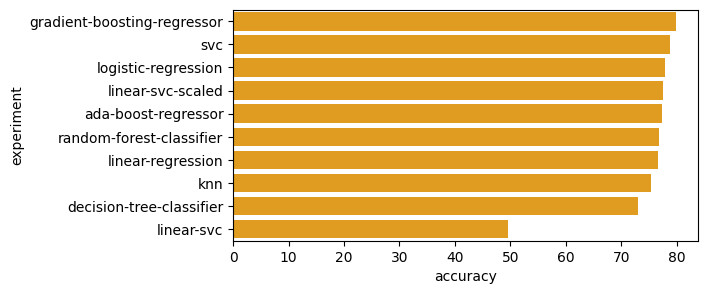

In [195]:
plt.figure(figsize=(6, 3)) 
sns.barplot(result_df.sort_values("accuracy", ascending=False), y='experiment', x='accuracy', estimator=lambda x: sum(x) * 100.0, color='orange');
# In conclusion we reach the best accuracy with gradient boosting regressor model (just a little under 80%)
# All models besides decision tree classifier and linear svc, have 75+% accuracy
# Therefore we must do more testing to choose between the models

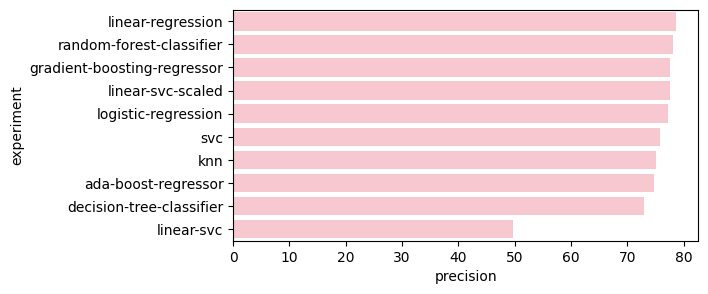

In [199]:
plt.figure(figsize=(6, 3)) 
sns.barplot(result_df.sort_values("precision", ascending=False), y='experiment', x='precision', estimator=lambda x: sum(x) * 100.0, color='pink');
# If our priority is to minimize false positives (precision), then we should look at this plot
# The best precision is reached by linear regression model (with almost 79% precision) 
# All others (besides linear svc) have 73+% precision
# Again the precision results range is small and we should do more testing


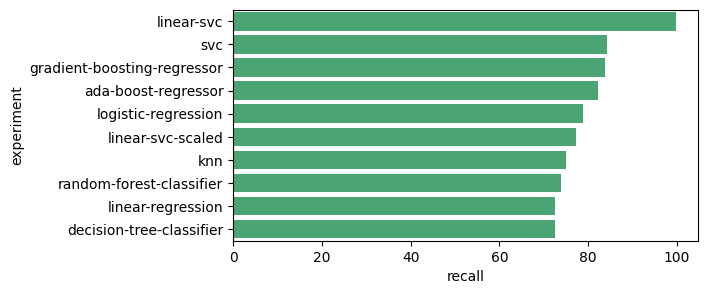

In [202]:
plt.figure(figsize=(6, 3)) 
sns.barplot(result_df.sort_values("recall", ascending=False), y='experiment', x='recall', estimator=lambda x: sum(x) * 100.0, color='mediumseagreen');
# If our priority is to minimize false negatives (recall), we should look at the following plot
# The best recall is reached by linear svc model (with almost 100% recall) which would be expected as it performed poorly for precision 
# The others have recall between 72% and 84%

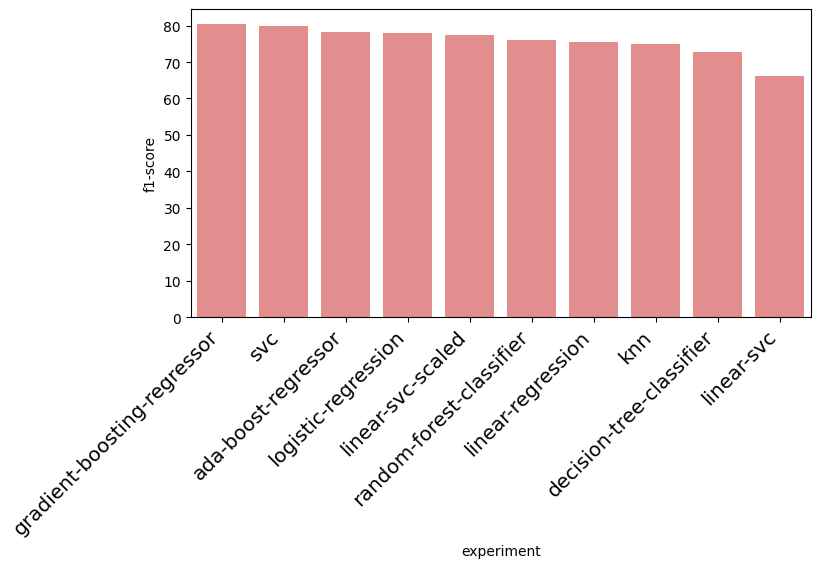

In [209]:
plt.figure(figsize=(8, 4)) 
chart = sns.barplot(result_df.sort_values("f1-score", ascending=False), x='experiment', y='f1-score', estimator=lambda x: sum(x) * 100.0, color='lightcoral');
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

# Lastly the most important metric would be f1-score which is calculated by precision and recall
# The best model would be gradient boosting regressor with a little over 80%
# All models have f1-score above 73%, besides linear svc